# Analysis

In [64]:
import pandas as pd
import plotnine as pn
print(pn.__version__)

0.10.1


In [65]:
# Load data

params = [
    0, 1, 2, 4, 8, 16, # nosofsky
    # 0.1, 0.2, 0.5, 0.6, 0.75, 1, 2, 3, 5, 1000 # exp
]

# Learned
# dynamic = "reinforcement_learning"
dynamic = "replicator_dynamic"

# num_trials = 10
num_trials = 100

# similarity = "nosofsky"
similarity = "nosofsky_normed"
# similarity = "exp"
# similarity = "exp_normed"

distortion = "squared_dist"
# distortion = "abs_dist"

out = "multirun"
# out = "outputs"

# trajectory = True
trajectory = False


#############################################################################
# Below three saved in outputs, not multirun

# Pareto frontier
curve_fn = f"/Users/nathanielimel/lps/projects/rdsg/outputs/states=10/signals=10/distortion={distortion}/curve_points.csv"

# Counterpart points
counterpart_fn = f"/Users/nathanielimel/lps/projects/rdsg/outputs/states=10/signals=10/distortion={distortion}/counterpart_points.csv"

# Explored hypothetical systems
sampled_fn = f"/Users/nathanielimel/lps/projects/rdsg/outputs/states=10/signals=10/distortion={distortion}/sampled_points.csv"

#############################################################################
# Typically saved in multirun
# Simulation points
param_fns = {
    f"{float(param)}":f"/Users/nathanielimel/lps/projects/rdsg/{out}/states=10/signals=10/distortion={distortion}/similarity={similarity}/dynamics={dynamic}/num_trials={num_trials}/sim_param={param}/simulation_points.csv"
    for param in params
}

variant_fns = {key: val.replace("simulation_points", "variants_points") for key, val in param_fns.items()}

if trajectory:
    param_fns = {key: val.replace("simulation_points", "mean_points") for key, val in param_fns.items()}



In [66]:
# load dataframes
curve_data = pd.read_csv(curve_fn)
counterpart_data = pd.read_csv(counterpart_fn)
sampled_data = pd.read_csv(sampled_fn)

simulation_dataframes = {
    k: pd.read_csv(param_fns[k]) for k in param_fns
}

variant_dataframes = {
    k: pd.read_csv(variant_fns[k]) for k in variant_fns
}

In [67]:
param_names = {"exp": "beta", "nosofsky": "alpha"}
for name in param_names:
    if name in similarity:
        param_name = param_names[name]

# combine simulation dataframes
for key in simulation_dataframes:
    df = simulation_dataframes[key]
    df[param_name] = key # use string for category

sim_data = pd.concat(simulation_dataframes.values())
sim_data

,rate,distortion,alpha
0,3.121928e+00,3.600000,0.0
1,2.721928e+00,2.900000,0.0
2,2.646439e+00,7.799986,0.0
3,3.121928e+00,0.900000,0.0
4,3.121928e+00,1.600000,0.0
...,...,...,...
95,5.980023e-07,14.499976,16.0
96,1.882065e-03,14.477780,16.0
97,6.362426e-07,28.499971,16.0
98,4.791585e-05,20.498384,16.0


In [68]:
# combine variant dataframes
# combine simulation dataframes
for key in variant_dataframes:
    df = variant_dataframes[key]
    df[param_name] = key # use string for category

variant_data = pd.concat(variant_dataframes.values())
variant_data

,rate,distortion,alpha
0,3.027853,18.293286,0.0
1,2.951581,15.919964,0.0
2,2.846439,6.193107,0.0
3,2.951581,13.827393,0.0
4,2.921928,15.134286,0.0
...,...,...,...
995,0.014641,16.268981,16.0
996,0.015419,16.914568,16.0
997,0.012632,16.981007,16.0
998,0.017114,16.989277,16.0


In [69]:
# Optional: Cast to int if all params are ints

sim_data[param_name] = sim_data[param_name].astype(float)
sim_data[param_name] = sim_data[param_name].astype(int)
sim_data[param_name] = sim_data[param_name].astype(str)

variant_data[param_name] = variant_data[param_name].astype(float)
variant_data[param_name] = variant_data[param_name].astype(int)
variant_data[param_name] = variant_data[param_name].astype(str)

counterpart_data[param_name] = counterpart_data[param_name].astype(float)
counterpart_data[param_name] = counterpart_data[param_name].astype(int)
counterpart_data[param_name] = counterpart_data[param_name].astype(str)

sim_data

,rate,distortion,alpha
0,3.121928e+00,3.600000,0
1,2.721928e+00,2.900000,0
2,2.646439e+00,7.799986,0
3,3.121928e+00,0.900000,0
4,3.121928e+00,1.600000,0
...,...,...,...
95,5.980023e-07,14.499976,16
96,1.882065e-03,14.477780,16
97,6.362426e-07,28.499971,16
98,4.791585e-05,20.498384,16


In [70]:
# plot each language, with a unique color for each gamma

# hard to clean this up with pd.Categorical
if param_name == "alpha":
    counterpart_data = counterpart_data.assign(
            alpha=pd.Categorical(
                counterpart_data["alpha"], 
                categories=[str(param) for param in params]
            )
        )

    sim_data = sim_data.assign(
            alpha=pd.Categorical(
                sim_data["alpha"], 
                categories=[str(param) for param in params]
            )
        )
else:
    counterpart_data = counterpart_data.assign(
            beta=pd.Categorical(
                counterpart_data["beta"], 
                categories=[str(param) for param in params]
            )
        )

    sim_data = sim_data.assign(
            beta=pd.Categorical(
                sim_data["beta"], 
                categories=[str(param) for param in params]
            )
        )


# Language keys
sim_data["language"] = {"reinforcement_learning": "learned", "replicator_dynamic": "evolved"}[dynamic]
# counterpart_data["language"] = "optimal counterpart"
counterpart_data["language"] = "optimal \ncounterpart"
all_data = pd.concat([counterpart_data, sim_data])

sampled_data["language"] = "hypothetical"
variant_data["language"] = "hypothetical"

# Trajectory keys
if trajectory:
    sim_data["time step"] = sim_data["round"]

counterpart_data


,rate,distortion,beta,alpha,language
0,3.321928,0.000000,1000.000000,0,optimal \ncounterpart
1,1.862177,0.485048,1.000000,1,optimal \ncounterpart
2,0.963131,1.822883,0.250000,2,optimal \ncounterpart
3,0.057531,7.616357,0.062500,4,optimal \ncounterpart
4,0.001560,8.380513,0.015625,8,optimal \ncounterpart
5,0.000248,8.845957,0.003906,16,optimal \ncounterpart


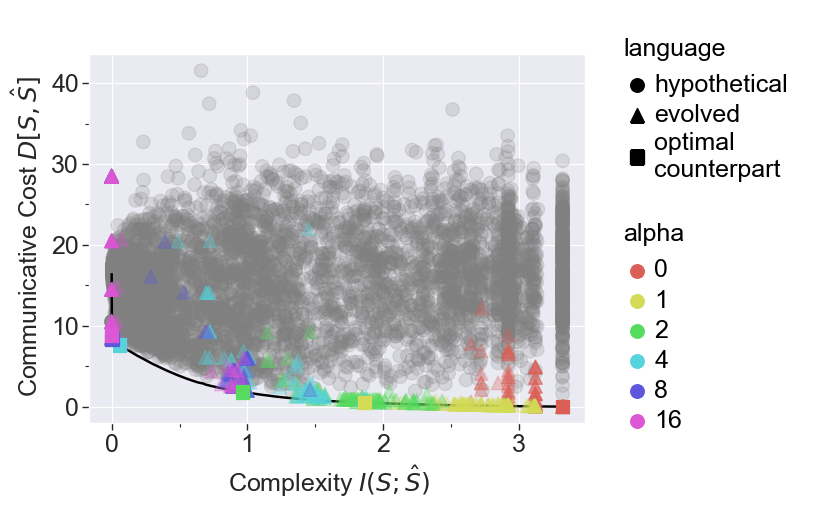

In [71]:
plot = (
    # Set data and the axes
    pn.ggplot(
        data=curve_data, mapping=pn.aes(x="rate", y="distortion")
    )  
    + pn.geom_point(  # sampled langs
        # sampled_data,
        variant_data,
        pn.aes(shape="language"),
        color="gray",
        size=5,
        alpha=0.2,
    )
    + pn.geom_line(size=1) # pareto data                   
    + pn.geom_jitter( # simulation langs
        data=sim_data,
        mapping=pn.aes(
            color=param_name, 
            shape="language",
            ),
        alpha=0.3,
        size=5,
        # height=0.1,
    )
    + pn.geom_point( # theoretical bound langs last
        data=counterpart_data,
        mapping=pn.aes(
            color=param_name,
            shape="language",
            ),
        size=5,
    )    
    + pn.xlab("Complexity $I(S;\hat{S})$")
    + pn.ylab("Communicative Cost $D[S, \hat{S}]$")
    + pn.theme_seaborn(context="paper")
    + pn.theme(text=pn.element_text(size=18))
)
print(plot)

In [72]:
# Save plot (will overwrite!)

plot_save_dir = f"/Users/nathanielimel/lps/projects/rdsg/multirun/states=10/signals=10/distortion={distortion}/similarity={similarity}/dynamics={dynamic}/num_trials={num_trials}"
fn = plot_save_dir + f"/multiple_{param_name}.png"
plot.save(filename=fn, width=10, height=10, dpi=300)
print(fn)

/Users/nathanielimel/lps/projects/rdsg/multirun/states=10/signals=10/distortion=squared_dist/similarity=nosofsky_normed/dynamics=replicator_dynamic/num_trials=100/multiple_alpha.png


## Plot trajectories

In [73]:
# Load data
mean_traj_fns = {
    key: val.replace("simulation_points", "mean_points") for key, val in param_fns.items()
}

mean_traj_dataframes = {
    k: pd.read_csv(mean_traj_fns[k]) for k in mean_traj_fns
}

# combine simulation dataframes
for key in mean_traj_dataframes:
    df = mean_traj_dataframes[key]
    df["alpha"] = key # use string for category

mean_traj_data = pd.concat(mean_traj_dataframes.values())
mean_traj_data = mean_traj_data.dropna() # unnecessary if all files were trajectories

mean_traj_data

,rate,distortion,round,alpha
0,0.007441,16.484485,0,0.0
1,0.063773,15.825094,1,0.0
2,0.600350,12.339445,2,0.0
3,1.760214,7.261424,3,0.0
4,2.518333,4.203935,4,0.0
...,...,...,...,...
195,0.139133,13.659197,195,16.0
196,0.139536,13.653757,196,16.0
197,0.139996,13.646922,197,16.0
198,0.140527,13.638540,198,16.0


In [74]:
mean_traj_data["alpha"] = mean_traj_data["alpha"].astype(float)
mean_traj_data["alpha"] = mean_traj_data["alpha"].astype(int)
mean_traj_data["alpha"] = mean_traj_data["alpha"].astype(str)

mean_traj_data = mean_traj_data.assign(
    alpha=pd.Categorical(
        mean_traj_data["alpha"],
        categories=[str(param) for param in params]
    )
)

mean_traj_data["language"] = {"reinforcement_learning": "learned", "replicator_dynamic": "evolved"}[dynamic]

mean_traj_data

,rate,distortion,round,alpha,language
0,0.007441,16.484485,0,0,evolved
1,0.063773,15.825094,1,0,evolved
2,0.600350,12.339445,2,0,evolved
3,1.760214,7.261424,3,0,evolved
4,2.518333,4.203935,4,0,evolved
...,...,...,...,...,...
195,0.139133,13.659197,195,16,evolved
196,0.139536,13.653757,196,16,evolved
197,0.139996,13.646922,197,16,evolved
198,0.140527,13.638540,198,16,evolved


In [75]:
# Extract the final rounds

final_round = mean_traj_data["round"].max()
final_round_data = mean_traj_data[mean_traj_data["round"] == final_round]


In [76]:
# try latex for color

# r'$\sin (x)$'

final_round_data["$\alpha$"] = final_round_data["alpha"]
mean_traj_data["$\alpha$"] = mean_traj_data["alpha"]

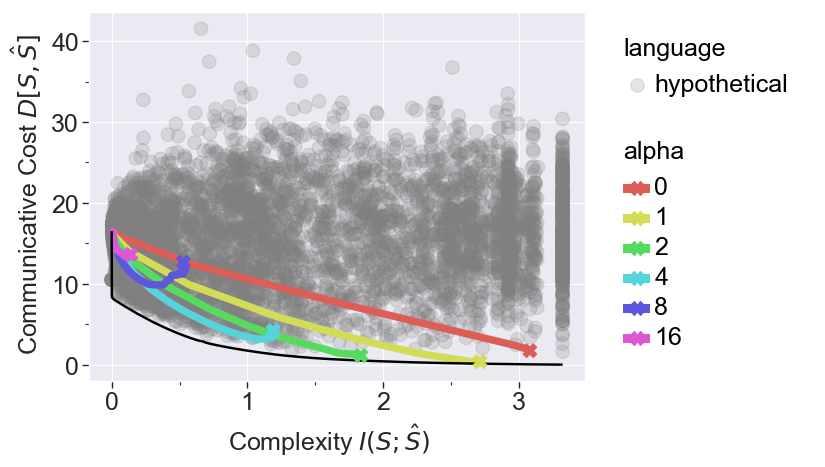

In [77]:
plot = (
    # Set data and the axes
    pn.ggplot(
            data=curve_data, mapping=pn.aes(x="rate", y="distortion")
    )  # pareto data    
    + pn.geom_point(  # sampled langs
        # sampled_data,
        variant_data,
        pn.aes(shape="language"),
        color="gray",
        size=5,
        alpha=0.2,
    )
    + pn.geom_line(  # simulation langs
        data=mean_traj_data,
        mapping=pn.aes(color="alpha"),
        # shape="o",
        alpha=1.0,
        size=3,
    )
    + pn.geom_line(size=1) # pareto     
    + pn.geom_point(  # final langs
        data=final_round_data,
        mapping=pn.aes(color="alpha"),
        shape="X",
        alpha=1.0,
        size=5,
    )
    + pn.xlab("Complexity $I(S;\hat{S})$")
    + pn.ylab("Communicative Cost $D[S, \hat{S}]$")
    + pn.theme_seaborn(context="paper")
    + pn.theme(text=pn.element_text(size=18))
)
print(plot)

In [78]:
# Save plot (will overwrite!)

plot_save_dir = f"/Users/nathanielimel/lps/projects/rdsg/multirun/states=10/signals=10/distortion={distortion}/similarity={similarity}/dynamics={dynamic}/num_trials={num_trials}"
fn = plot_save_dir + "/alpha_trajectories.png"
plot.save(filename=fn, width=10, height=10, dpi=300)

# Perform statistical analyses

### Measure optimality

In [79]:
# N.B.: The reason we need to copypaste this function is because it is sometimes more convenient to measure optimality all at once here, instead of running python script in a hydra sweep (if I forgot to)
import numpy as np
from scipy.spatial.distance import cdist

def measure_optimality(data: pd.DataFrame, curve_data: pd.DataFrame) -> np.ndarray:
    """Compute the min distance to any point on the frontier, for every point. Requires `data` to contain more than one row."""
    # get curve points as list of pairs
    pareto_points = np.array(list(curve_data[["rate", "distortion"]].itertuples(index=False, name=None)))
    points = np.array(list(data[["rate", "distortion"]].itertuples(index=False, name=None)))
    # N.B.: do not interpolate, so you don't measure high-dist random langs as more optimal than they are!

    # Measure closeness of each language to any frontier point
    distances = cdist(points, pareto_points)
    min_distances = np.min(distances, axis=1)

    # max complexity will be achieved by B-A    
    max_complexity = pareto_points[:, 0].max()
    # points may have higher cost than pareto max cost    
    max_cost = max(points[:,1].max(), pareto_points[:,].max())
    # max possible distance is sqrt( max_rate^2 + (max_distortion)^2 )
    max_distance = np.sqrt(max_cost**2 + max_complexity**2)

    # just use the max found distance? 
    # max_distance = np.max(min_distances)

    min_distances /= max_distance
    optimalities = 1 - min_distances
    return optimalities
    
    # return min_distances

In [80]:
sim_data["optimality"] = measure_optimality(sim_data, curve_data)
variant_data["optimality"] = measure_optimality(variant_data, curve_data)
# sampled_data["optimality"] = measure_optimality(sampled_data, curve_data)


In [81]:
display(sim_data.mean())
display(variant_data.mean())


rate          1.587179
distortion    5.804255
optimality    0.947340
dtype: float64

rate           1.259369
distortion    15.356418
alpha               inf
optimality     0.940075
dtype: float64

In [82]:
display(sim_data.min())
display(variant_data.min())
display(sampled_data.min())

rate               0.0
distortion         0.0
language       evolved
optimality    0.581779
dtype: object

rate                   0.0
distortion             1.6
alpha                    0
language      hypothetical
optimality        0.398795
dtype: object

rate                   0.0
distortion             0.0
optimality        0.742771
language      hypothetical
dtype: object

### Show optimality in violin plots
*N.B.: need to change python interpreter to 'seaborn'!*

In [83]:
# N.B.: good violin plots requires seaborn 0.12.2, which is incompatible with plotnine
import seaborn as sns
import matplotlib.pyplot as plt
plt.ion()
sns.set_theme()

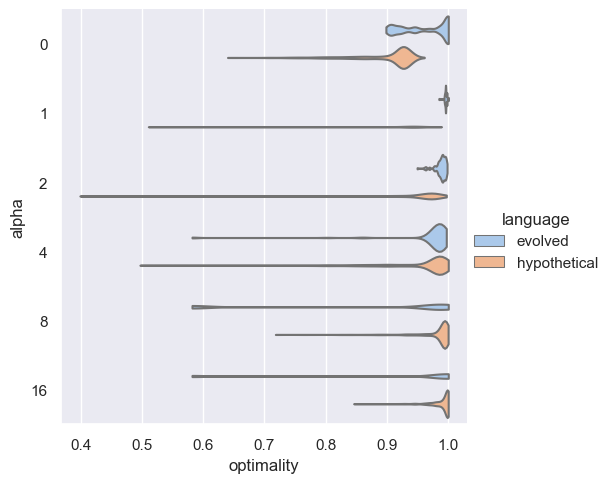

In [84]:

data = pd.concat([sim_data, variant_data])

violin = sns.catplot(
    data=data, y="alpha", x="optimality", hue="language", kind="violin", inner=None, split=False, cut=0, bw=.15, palette="pastel"
)

# violin.set(xlim=(None, None))

# sns.catplot(
#     data=tips, x="day", y="total_bill", hue="sex",
#     kind="violin", inner="stick", split=True, palette="pastel",
# )

plt.show()
# plt.savefig("rep_violin.png")

### be messy and load up rl data

In [85]:
# load up rl data by hand, not from saved

# Simulation points
param_fns_rl = {
    f"{float(param)}":f"/Users/nathanielimel/lps/projects/rdsg/{out}/states=10/signals=10/distortion={distortion}/similarity={similarity}/dynamics=reinforcement_learning/num_trials={num_trials}/sim_param={param}/simulation_points.csv"
    for param in params
}

variant_fns_rl = {key: val.replace("simulation_points", "variants_points") for key, val in param_fns.items()}


simulation_dataframes_rl = {
    k: pd.read_csv(param_fns_rl[k]) for k in param_fns_rl
}

variant_dataframes_rl = {
    k: pd.read_csv(variant_fns_rl[k]) for k in variant_fns_rl
}


# combine simulation dataframes
for key in simulation_dataframes_rl:
    df = simulation_dataframes_rl[key]
    df[param_name] = key # use string for category

sim_data_rl = pd.concat(simulation_dataframes_rl.values())
display(sim_data_rl)


# combine
for key in variant_dataframes_rl:
    df = variant_dataframes_rl[key]
    df[param_name] = key # use string for category

variant_data_rl = pd.concat(variant_dataframes_rl.values())
display(variant_data_rl)

,rate,distortion,alpha
0,3.275276,0.048496,0.0
1,2.777001,10.416543,0.0
2,2.704034,1.445759,0.0
3,2.882935,1.331747,0.0
4,3.087389,1.665824,0.0
...,...,...,...
95,0.022246,14.445306,16.0
96,0.015009,15.139953,16.0
97,0.025801,14.887824,16.0
98,0.017506,15.190406,16.0


,rate,distortion,alpha
0,3.027853,18.293286,0.0
1,2.951581,15.919964,0.0
2,2.846439,6.193107,0.0
3,2.951581,13.827393,0.0
4,2.921928,15.134286,0.0
...,...,...,...
995,0.014641,16.268981,16.0
996,0.015419,16.914568,16.0
997,0.012632,16.981007,16.0
998,0.017114,16.989277,16.0


In [86]:
# more messiness

sim_data_rl["optimality"] = measure_optimality(sim_data_rl, curve_data)
variant_data_rl["optimality"] = measure_optimality(variant_data_rl, curve_data)


sim_data_rl[param_name] = sim_data_rl[param_name].astype(float)
sim_data_rl[param_name] = sim_data_rl[param_name].astype(int)
sim_data_rl[param_name] = sim_data_rl[param_name].astype(str)

variant_data_rl[param_name] = variant_data_rl[param_name].astype(float)
variant_data_rl[param_name] = variant_data_rl[param_name].astype(int)
variant_data_rl[param_name] = variant_data_rl[param_name].astype(str)


sim_data_rl = sim_data_rl.assign(
            alpha=pd.Categorical(
                sim_data_rl["alpha"], 
                categories=[str(param) for param in params]
            )
        )

variant_data_rl = variant_data_rl.assign(
            alpha=pd.Categorical(
                variant_data_rl["alpha"],
                categories=[str(param) for param in params]
            )
)


sim_data_rl["language"] = "learned"
variant_data_rl["language"] = "hypothetical"

sim_data_rl

,rate,distortion,alpha,optimality,language
0,3.275276,0.048496,0,0.997359,learned
1,2.777001,10.416543,0,0.836781,learned
2,2.704034,1.445759,0,0.926164,learned
3,2.882935,1.331747,0,0.928498,learned
4,3.087389,1.665824,0,0.906232,learned
...,...,...,...,...,...
95,0.022246,14.445306,16,0.998699,learned
96,0.015009,15.139953,16,0.999124,learned
97,0.025801,14.887824,16,0.998489,learned
98,0.017506,15.190406,16,0.998976,learned


In [87]:
# get violin for both
rep_data = pd.concat([sim_data, variant_data])
rl_data = pd.concat([sim_data_rl, variant_data_rl])
dynamics_data = pd.concat([rep_data, rl_data])

# change language to categorical to customize ordering
dynamics_data = dynamics_data.assign(
        language=pd.Categorical(
                dynamics_data["language"], 
                categories=["learned", "evolved", "hypothetical"]
            )
        )

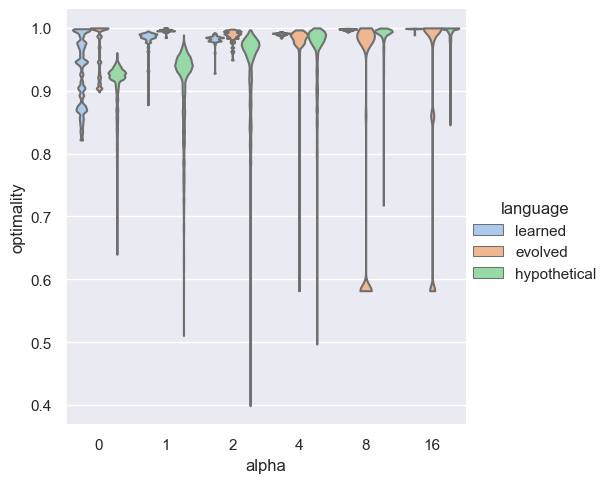

In [88]:

violin = sns.catplot(
    data=dynamics_data,
    x="alpha", y="optimality", 
    hue="language", 
    kind="violin", 
    inner=None, 
    split=False, 
    cut=0, 
    bw=.05, 
    palette="pastel",
    scale="width",
)
plt.show()

In [89]:
dynamics_data = dynamics_data.assign(
        alpha=pd.Categorical(
                dynamics_data["alpha"], 
                categories=[str(param) for param in params]
            )
        )

## Try plotnine for violins

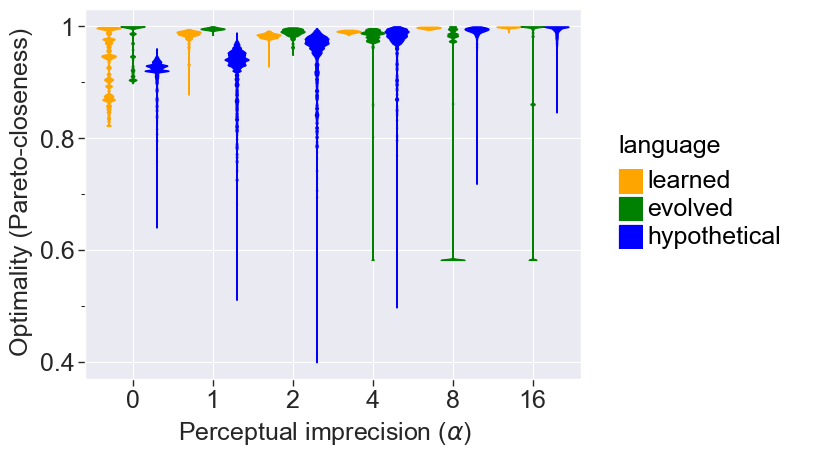

In [90]:
# want alpha to be floats again

values = {"learned": "orange", "evolved": "green", "hypothetical": "blue"}

plot = (
    # Set data and the axes
    pn.ggplot(
            data=dynamics_data, mapping=pn.aes(x="alpha", y="optimality")
    )
    + pn.geom_violin(
        data=dynamics_data,
        mapping=pn.aes(
            fill="language", 
            color="language", 
            ),
        scale="width",
        bw=0.0015,
    )
    + pn.scale_color_manual(values=values)
    + pn.scale_fill_manual(values=values)
    + pn.xlab("Perceptual imprecision ($\\alpha$)")
    + pn.ylab("Optimality (Pareto-closeness)")
    + pn.theme_seaborn(context='paper')
    + pn.theme(text=pn.element_text(size=18))
)
print(plot)

In [91]:
# save plot
fn = "optimality.png"
plot.save(filename=fn, width=10, height=10, dpi=300)

### other junk

In [92]:
# what does hypothetical look like?
data = pd.concat([sim_data, variant_data])

sns.displot(data=data, x="rate", y="deviation from optimality", hue="language",)

ValueError: Could not interpret value `deviation from optimality` for parameter `y`

In [ ]:
# save data for messing around later with plots

sim_data.to_csv("rl.csv", index=False)
# sampled_data.to_csv("explored.csv")
variant_data.to_csv("rl_variants.csv", index=False)


# sim_data.to_csv("rep_dyn.csv", index=False)
# variant_data.to_csv("rep_dyn_variants.csv", index=False)

## Figure with subplots

In [ ]:
import patchworklib as pw
print(pw.__version__)
print(pn.__version__)

0.5.0
0.10.1


<Figure size 100x100 with 0 Axes>

In [121]:
margin = {"t":0, "b":40, "l":0, "r":0}

plot1 = (
    # Set data and the axes
    pn.ggplot(
        data=curve_data, mapping=pn.aes(x="rate", y="distortion")
    )  
    + pn.geom_point(  # sampled langs
        # sampled_data,
        variant_data,
        pn.aes(shape="language"),
        color="gray",
        size=5,
        alpha=0.2,
    )
    + pn.geom_line(size=1) # pareto data                   
    + pn.geom_jitter( # simulation langs
        data=sim_data,
        mapping=pn.aes(
            color=param_name, 
            shape="language",
            ),
        alpha=0.3,
        size=5,
        # height=0.1,
    )
    + pn.geom_point( # theoretical bound langs last
        data=counterpart_data,
        mapping=pn.aes(
            color=param_name,
            shape="language",
            ),
        size=5,
    )    
    + pn.xlab("Complexity $I(S;\hat{S})$")
    + pn.ylab("Communicative Cost $D[S, \hat{S}]$")
    + pn.ggtitle("Roth-Erev Reinforcement Learning")
    + pn.theme(
                # legend_title=pn.element_blank(),
                figure_size=(12, 9),
                legend_position='none',
                legend_box='vertical',
                # plot_title=pn.element_text(margin=margin),
        )
)

In [122]:
plot2 = (
    # Set data and the axes
    pn.ggplot(
        data=curve_data, mapping=pn.aes(x="rate", y="distortion")
    )  
    + pn.geom_point(  # sampled langs
        # sampled_data,
        variant_data_rl,
        pn.aes(shape="language"),
        color="gray",
        size=5,
        alpha=0.2,
    )
    + pn.geom_line(size=1) # pareto data                   
    + pn.geom_jitter( # simulation langs
        data=sim_data_rl,
        mapping=pn.aes(
            color=param_name, 
            shape="language",
            ),
        alpha=0.3,
        size=5,
        # height=0.1,
    )
    + pn.geom_point( # theoretical bound langs last
        data=counterpart_data,
        mapping=pn.aes(
            color=param_name,
            shape="language",
            ),
        size=5,
    )    
    + pn.xlab("Complexity $I(S;\hat{S})$")
    + pn.ylab("Communicative Cost $D[S, \hat{S}]$")
    + pn.ggtitle("Discrete-time Replicator Dynamic")
    + pn.theme(
                # legend_title=pn.element_blank(),
                figure_size=(12, 9),
                legend_position='right',
                legend_box='vertical',
                plot_title=pn.element_text(margin=margin),
        )

)

In [124]:
plot1 = None
plot2 = None

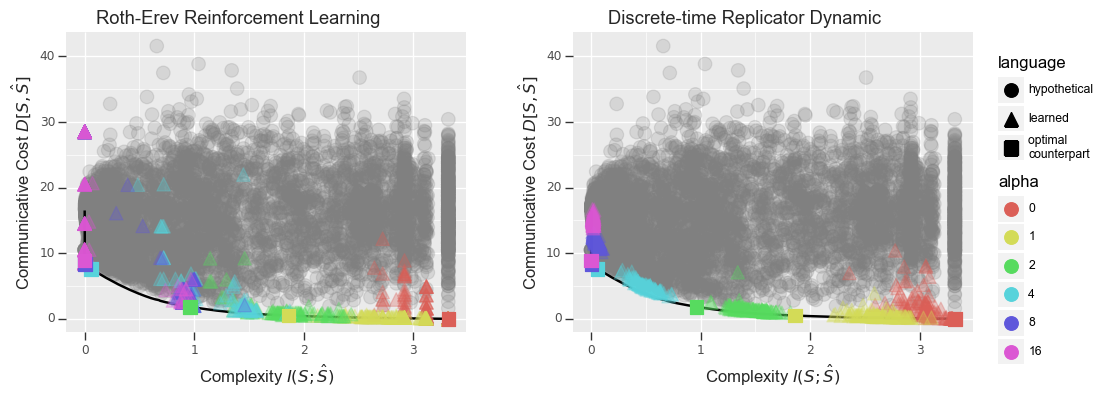

In [123]:
# combine figs

plot1 = pw.load_ggplot(plot1, figsize=(4,3))
plot2 = pw.load_ggplot(plot2, figsize=(4,3))

g = plot1 | plot2
g.savefig("example.png")

In [186]:
margin = {"t":0, "b":150, "l":200, "r":0}

plot1 = (
    # Set data and the axes
    pn.ggplot(
        data=curve_data, mapping=pn.aes(x="rate", y="distortion")
    )  
    + pn.geom_point(  # sampled langs
        # sampled_data,
        variant_data,
        pn.aes(shape="language"),
        color="gray",
        size=5,
        alpha=0.2,
    )
    + pn.geom_line(size=1) # pareto data                   
    + pn.geom_jitter( # simulation langs
        data=sim_data,
        mapping=pn.aes(
            color=param_name, 
            shape="language",
            ),
        alpha=0.3,
        size=5,
        # height=0.1,
    )
    + pn.geom_point( # theoretical bound langs last
        data=counterpart_data,
        mapping=pn.aes(
            color=param_name,
            shape="language",
            ),
        size=5,
    )    
    + pn.xlab("Complexity $I(S;\hat{S})$")
    + pn.ylab("Communicative Cost $D[S, \hat{S}]$")
    + pn.ggtitle("Roth-Erev Reinforcement Learning")
    + pn.theme(
                # legend_title=pn.element_blank(),
                figure_size=(12, 18),
                legend_position='none',
                legend_box='vertical',
                axis_title_x=pn.element_blank(),
                # axis_title_y=pn.element_blank(),   
                plot_title=pn.element_text(margin=margin),
        )
)

plot2 = (
    # Set data and the axes
    pn.ggplot(
        data=curve_data, mapping=pn.aes(x="rate", y="distortion")
    )  
    + pn.geom_point(  # sampled langs
        # sampled_data,
        variant_data_rl,
        pn.aes(shape="language"),
        color="gray",
        size=5,
        alpha=0.2,
    )
    + pn.geom_line(size=1) # pareto data                   
    + pn.geom_jitter( # simulation langs
        data=sim_data_rl,
        mapping=pn.aes(
            color=param_name, 
            shape="language",
            ),
        alpha=0.3,
        size=5,
        # height=0.1,
    )
    + pn.geom_point( # theoretical bound langs last
        data=counterpart_data,
        mapping=pn.aes(
            color=param_name,
            shape="language",
            ),
        size=5,
    )    
    # + pn.xlab("Complexity $I(S;\hat{S})$")
    # + pn.ylab("Communicative Cost $D[S, \hat{S}]$")
    + pn.ggtitle("Discrete-time Replicator Dynamic")
    + pn.theme(
                # legend_title=pn.element_blank(),
                figure_size=(12, 18),
                legend_position='right',
                legend_box='vertical',
                axis_title_x=pn.element_blank(),
                axis_title_y=pn.element_blank(),                                
                plot_title=pn.element_text(margin=margin),
                # plot_title=pn.element_text(ha="center"),
        )

)

plot3 = (
    # Set data and the axes
    pn.ggplot(
        data=curve_data, mapping=pn.aes(x="rate", y="distortion")
    )  
    + pn.geom_point(  # sampled langs
        # sampled_data,
        variant_data,
        pn.aes(shape="language"),
        color="gray",
        size=5,
        alpha=0.2,
    )
    + pn.geom_line(size=1) # pareto data                   
    + pn.geom_jitter( # simulation langs
        data=sim_data,
        mapping=pn.aes(
            color=param_name, 
            shape="language",
            ),
        alpha=0.3,
        size=5,
        # height=0.1,
    )
    + pn.geom_point( # theoretical bound langs last
        data=counterpart_data,
        mapping=pn.aes(
            color=param_name,
            shape="language",
            ),
        size=5,
    )    
    + pn.xlab("Complexity $I(S;\hat{S})$")
    + pn.ylab("Communicative Cost $D[S, \hat{S}]$")
    # + pn.ggtitle("Roth-Erev Reinforcement Learning")
    + pn.theme(
                # legend_title=pn.element_blank(),
                figure_size=(12, 18),
                legend_position='none',
                legend_box='vertical',
                # axis_title_x=pn.element_text(margin={"t":0, "b":0, "l":0, "r":800}),
                # axis_title_y=pn.element_text(margin={"t":800, "b":0, "l":0, "r":0}),
                # plot_title=pn.element_text(margin=margin),
        )
)

plot4 = (
    # Set data and the axes
    pn.ggplot(
        data=curve_data, mapping=pn.aes(x="rate", y="distortion")
    )  
    + pn.geom_point(  # sampled langs
        # sampled_data,
        variant_data,
        pn.aes(shape="language"),
        color="gray",
        size=5,
        alpha=0.2,
    )
    + pn.geom_line(size=1) # pareto data                   
    + pn.geom_jitter( # simulation langs
        data=sim_data,
        mapping=pn.aes(
            color=param_name, 
            shape="language",
            ),
        alpha=0.3,
        size=5,
        # height=0.1,
    )
    + pn.geom_point( # theoretical bound langs last
        data=counterpart_data,
        mapping=pn.aes(
            color=param_name,
            shape="language",
            ),
        size=5,
    )    
    + pn.xlab("Complexity $I(S;\hat{S})$")
    + pn.ylab("Communicative Cost $D[S, \hat{S}]$")
    # + pn.ggtitle("Roth-Erev Reinforcement Learning")
    + pn.theme(
                # legend_title=pn.element_blank(),
                figure_size=(12, 18),
                legend_position='none',
                legend_box='vertical',
                # axis_title_x=pn.element_blank(),
                axis_title_y=pn.element_blank(),   
                # plot_title=pn.element_text(margin=margin),
        )
)

In [181]:
plot1 = None
plot2 = None
plot3 = None
plot4 = None

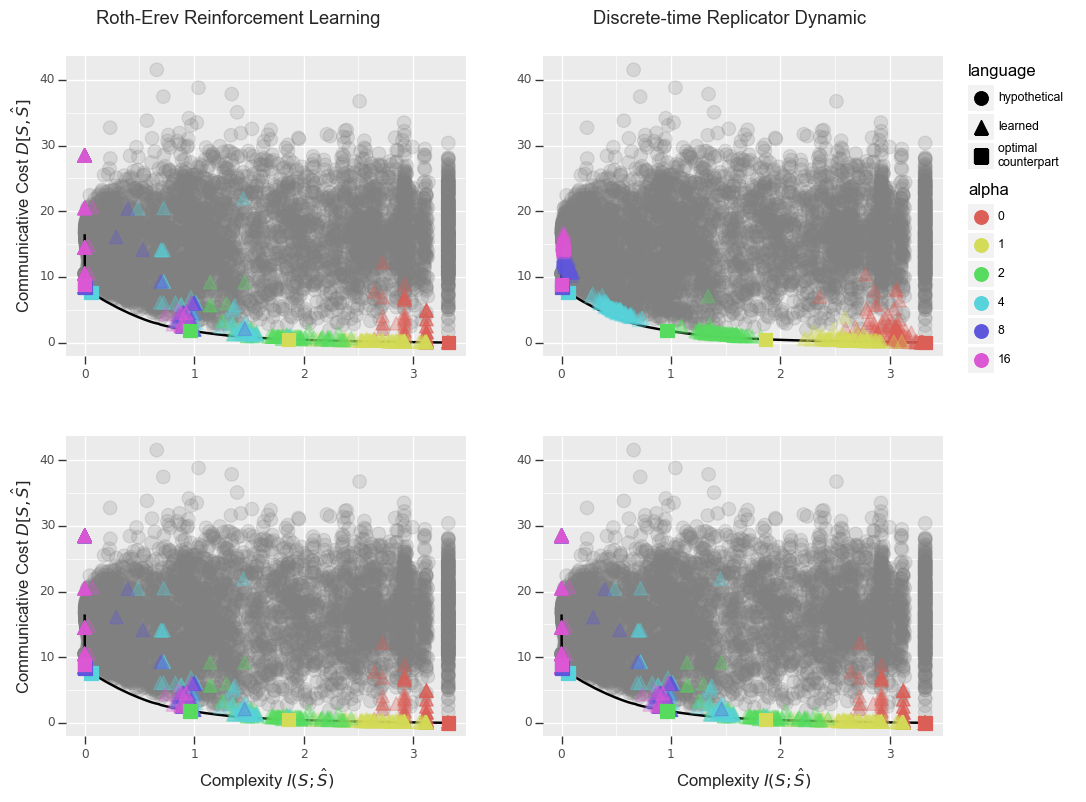

In [187]:
plot1 = pw.load_ggplot(plot1, figsize=(4,3))
plot2 = pw.load_ggplot(plot2, figsize=(4,3))
plot3 = pw.load_ggplot(plot3, figsize=(4,3))
plot4 = pw.load_ggplot(plot4, figsize=(4,3))

g = (plot1 | plot2) / (plot3 | plot4)
g.savefig("example.png")